In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("apples_cleaned.csv")

In [3]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 281.4 KB


In [5]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.499000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,0.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [6]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

In [7]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [8]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: >

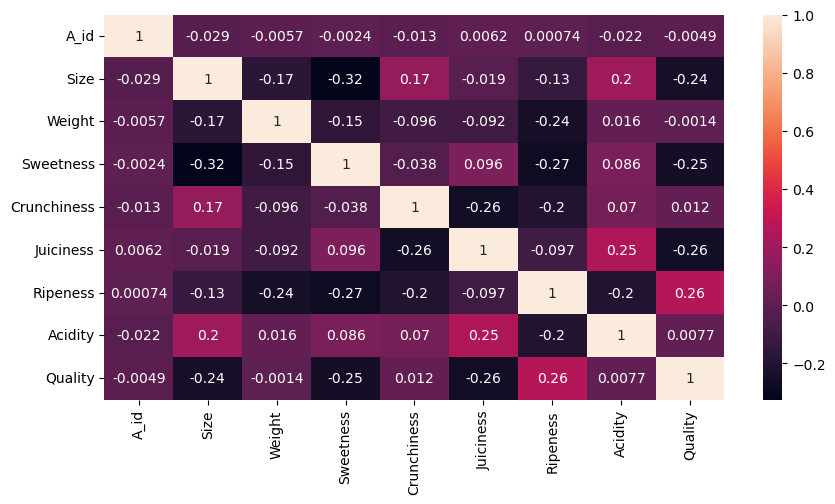

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [11]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

A_id: 4000 distinct values
Size: 4000 distinct values
Weight: 4000 distinct values
Sweetness: 4000 distinct values
Crunchiness: 4000 distinct values
Juiciness: 4000 distinct values
Ripeness: 4000 distinct values
Acidity: 4000 distinct values
Quality: 2 distinct values


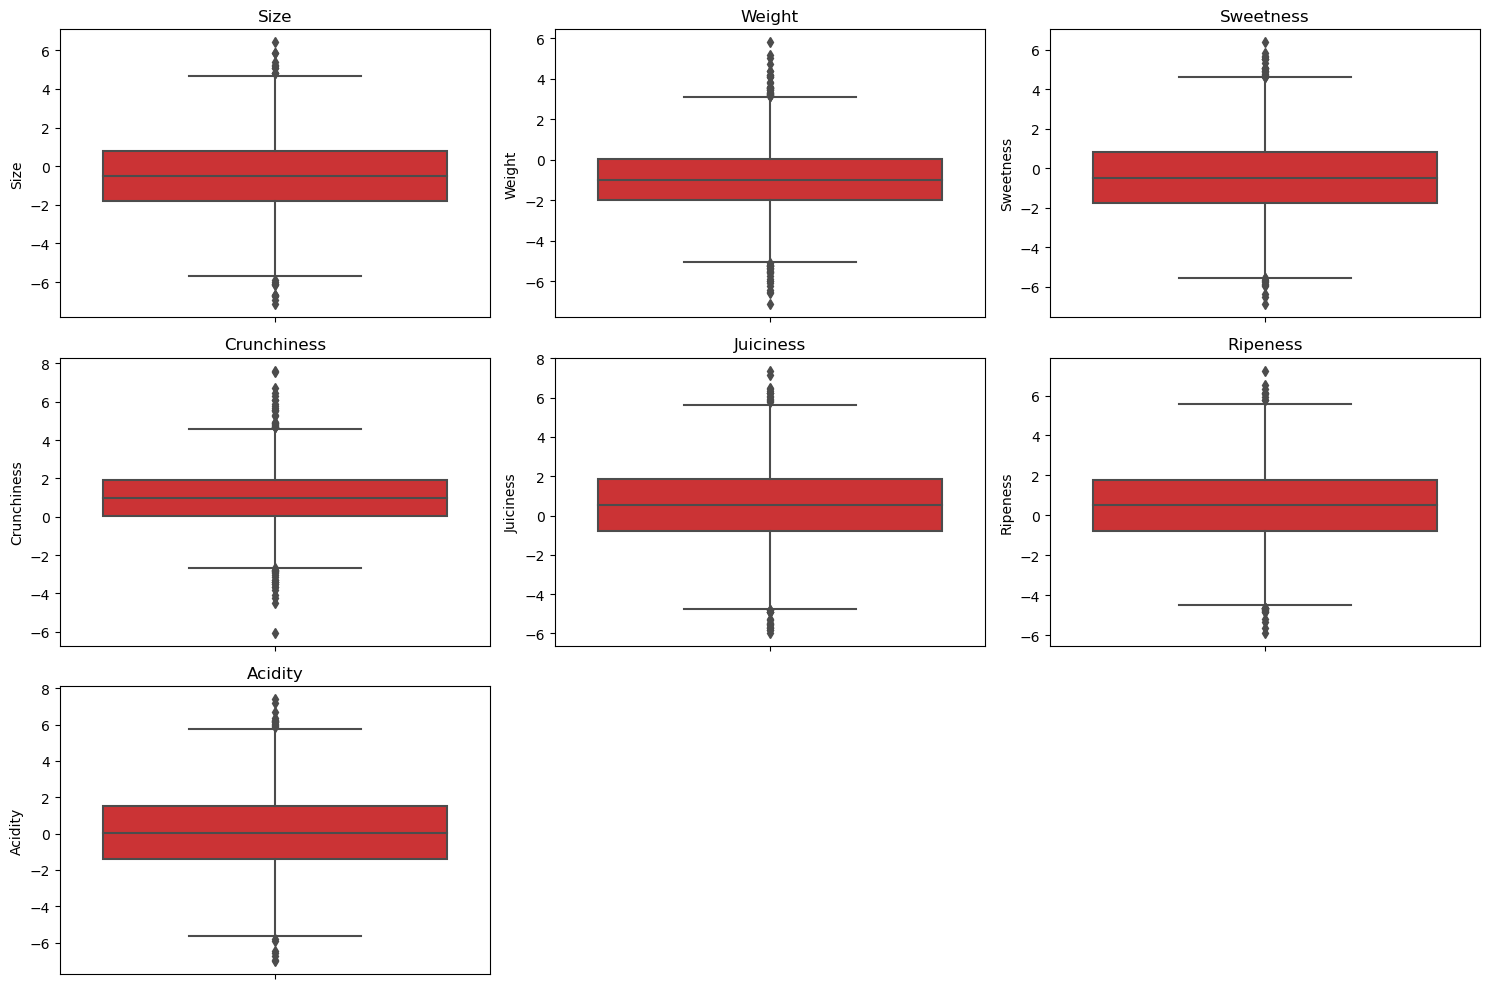

In [12]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
x = df.drop(["A_id","Quality"],axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
def plot_quality_pie_chart(df):
    # Calculate value counts for quality
    quality_counts = df['Quality'].value_counts()

    # Plot
    plt.figure(figsize=(8, 6))
    plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Distribution of Quality Values')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

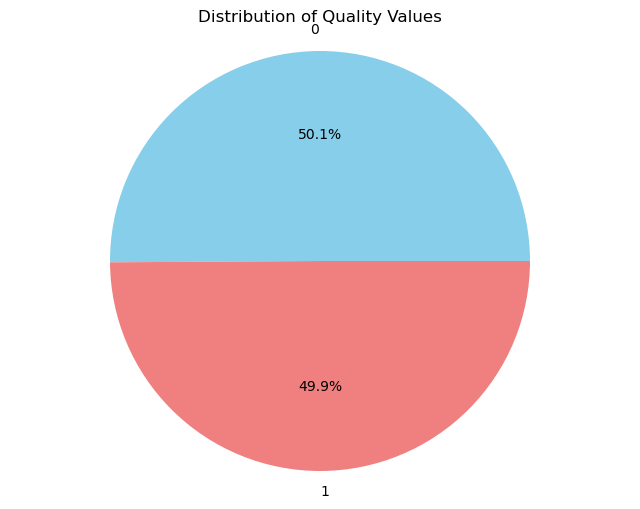

In [15]:
plot_quality_pie_chart(df)

In [16]:
def plot_box_plots(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=x, orient='h')
    plt.title('Box Plots of Independent Features')
    plt.xlabel('Value')
    plt.ylabel('Feature')
    plt.show()

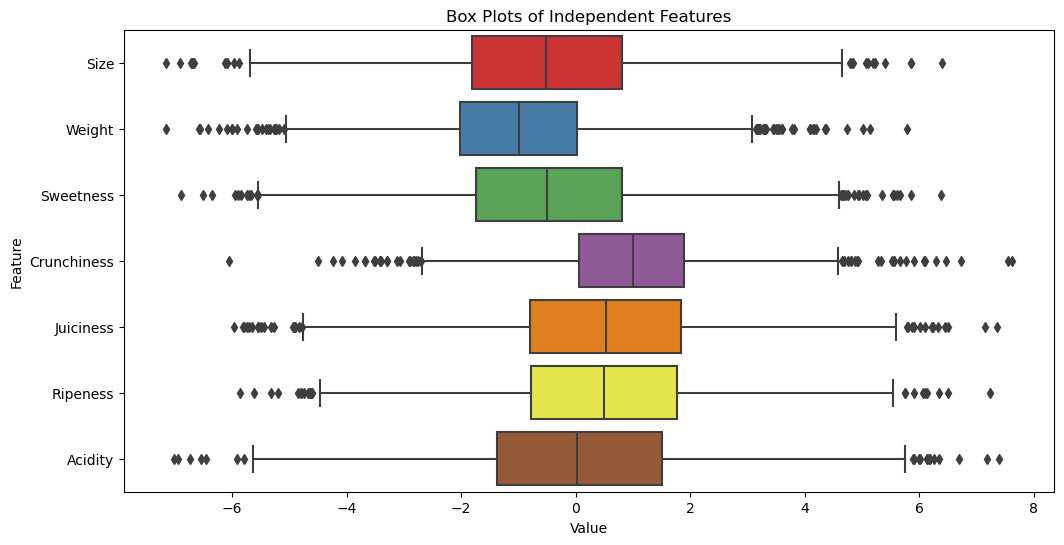

In [17]:
plot_box_plots(x)

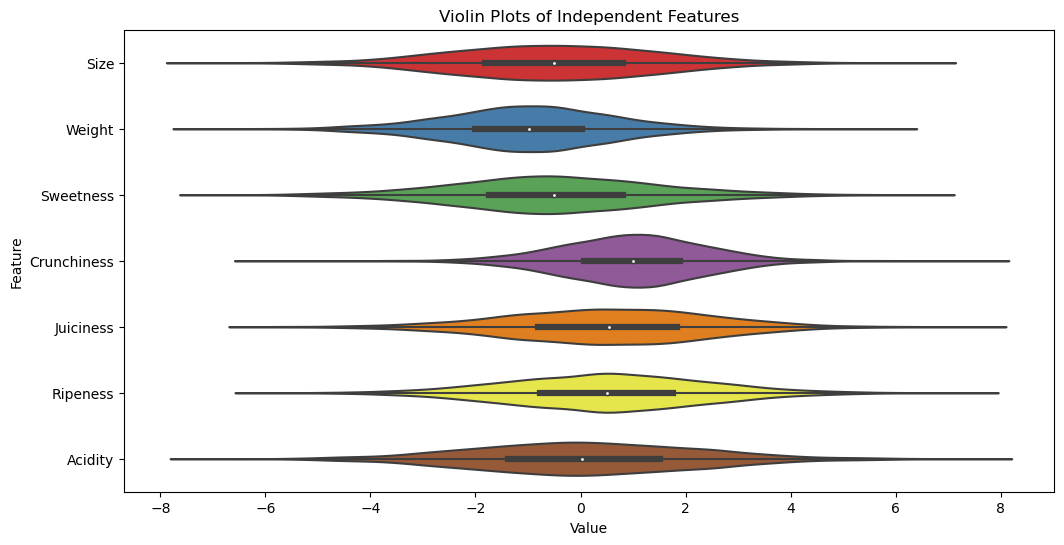

In [18]:
def plot_violin_plots(df):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=x, orient='h', split=True)
    plt.title('Violin Plots of Independent Features')
    plt.xlabel('Value')
    plt.ylabel('Feature')
    plt.show()
    
plot_violin_plots(x)

In [19]:
def plot_distribution_by_quality(df):
    features = x
    quality_levels = df['Quality'].unique()
    for feature in features:
        plt.figure(figsize=(8, 6))
        for quality in quality_levels:
            sns.kdeplot(df[df['Quality'] == quality][feature], label=f'Quality {quality}')
        plt.title(f'Distribution of {feature} by Quality')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

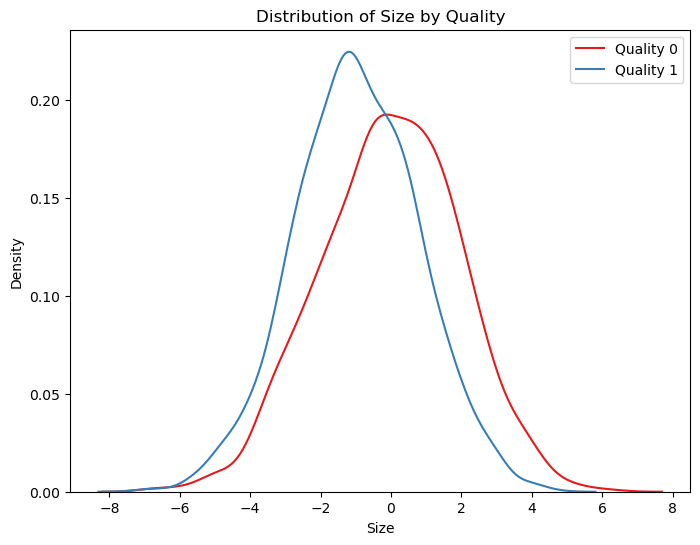

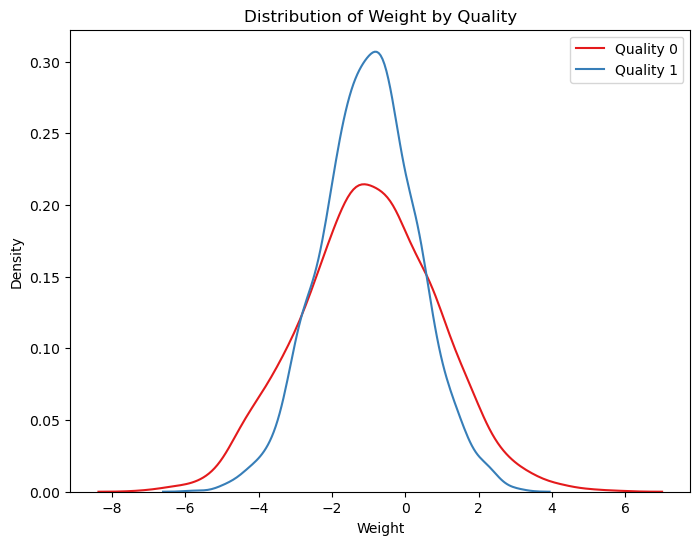

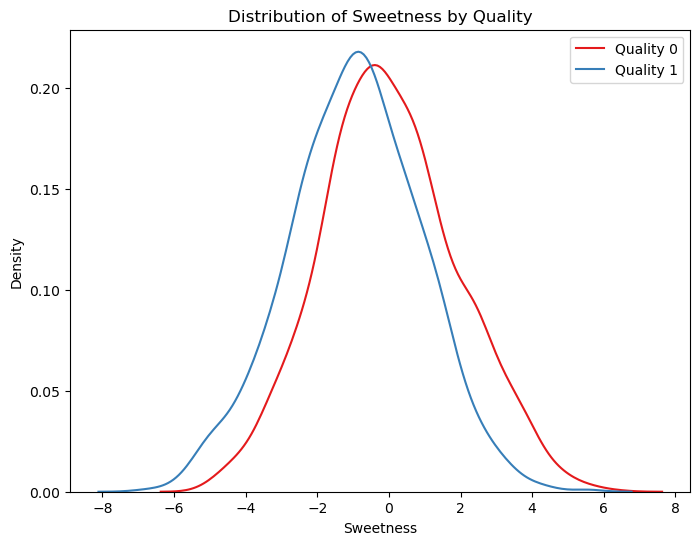

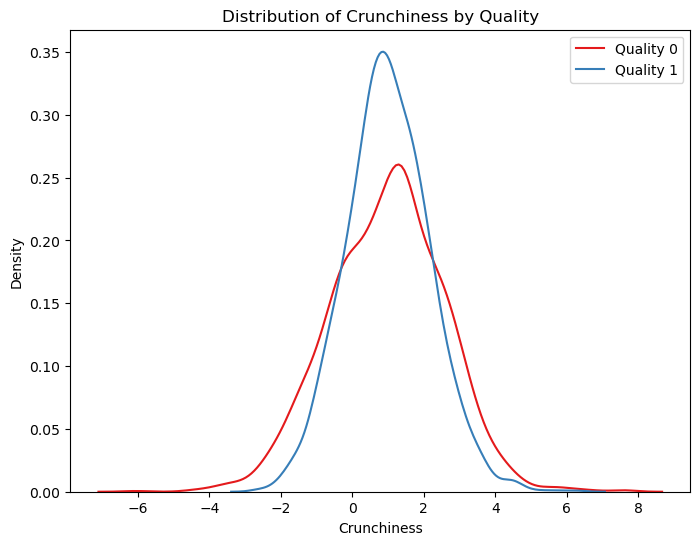

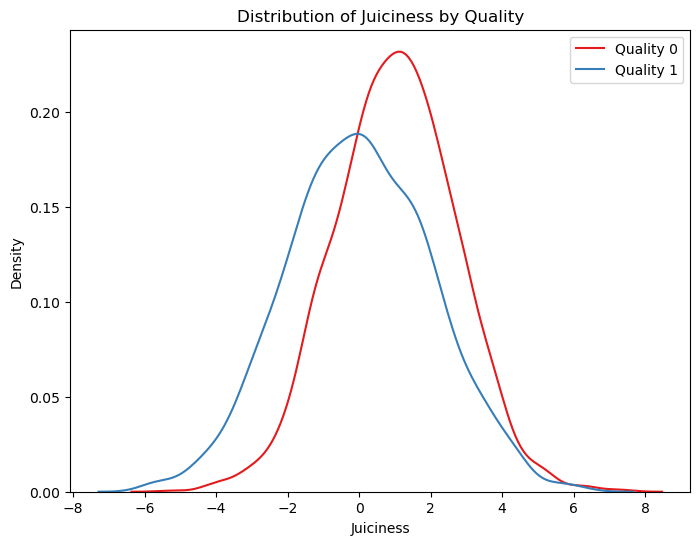

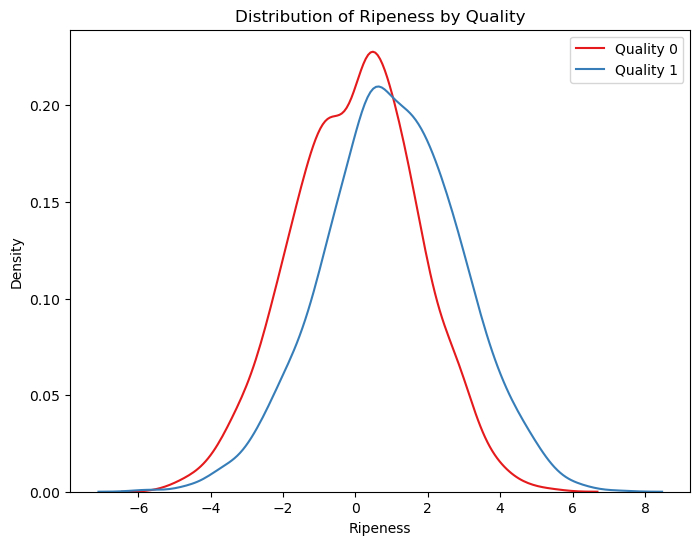

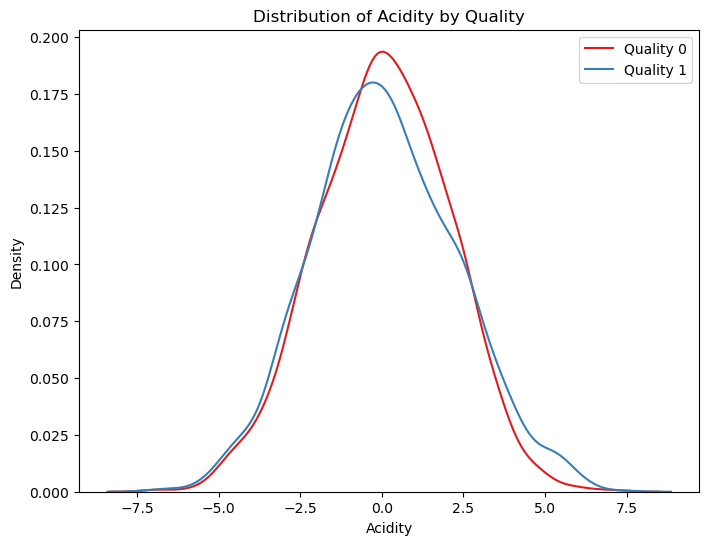

In [22]:
plot_distribution_by_quality(df)

In [23]:
def plot_distribution_by_quality(df):
    features = x
    quality_levels = df['Quality'].unique()

    plt.figure(figsize=(12, 8))

    for feature in features:
        for quality in quality_levels:
            sns.kdeplot(df[df['Quality'] == quality][feature], label=f'Quality {quality} - {feature}')
    plt.title('Distribution of Features by Quality')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

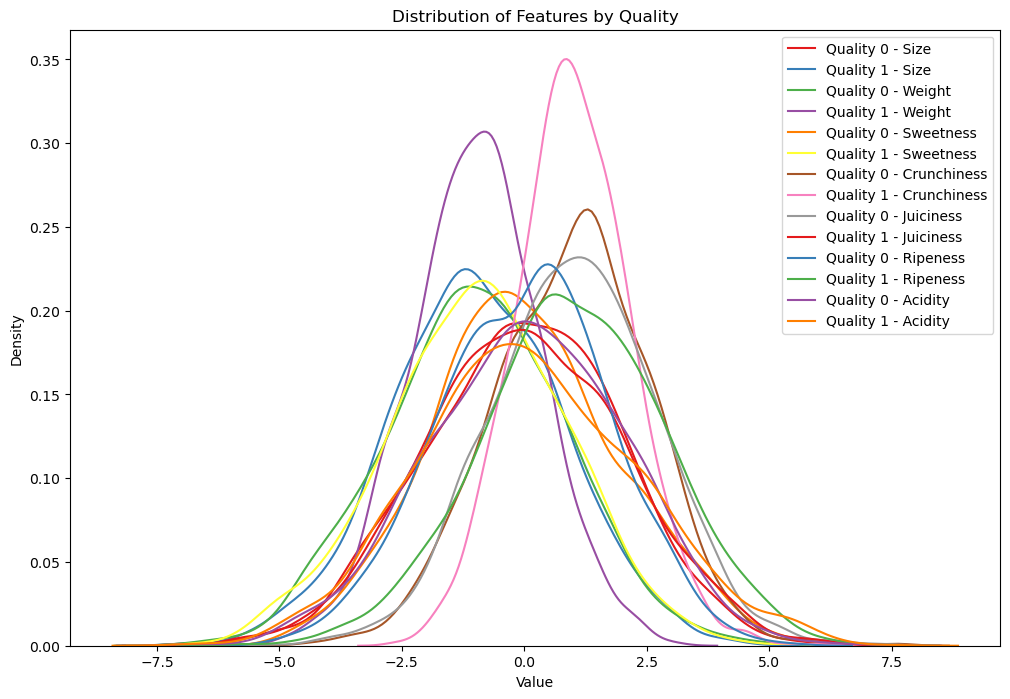

In [24]:
plot_distribution_by_quality(df)